In [2]:
import re

# Peguei do Wikisum: https://github.com/tensorflow/tensor2tensor/blob/master/tensor2tensor/data_generators/wikisum/utils.py
_SOME_ALPHA_RE = re.compile(r'[A-Za-z]+')
_ONLY_ALPHA_RE = re.compile(r'^[A-Za-z]*$')
def filter_paragraph(p):
    """Simple filter to remove obviously bad paragraphs (bad text extraction).
    Note this needs to run very quickly as it is applied to every paragraph
    in the corpus, so nothing fancy! This whole method should be linear
    expected time in len(p).
    Args:
    p: string, paragraph
    Returns:
    True if we should remove the paragraph.
    """
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy .
    p = re.sub(r"([?.!,¿])", r" \1 ", p)
    p = re.sub(r'[" "]+', " ", p)
    # substituir tudo por espaço exceto (a-z, A-Z, ".", "?", "!", ",", letras com acentos da lingua pt)
    p = re.sub(r"[^a-zA-ZçÇéêíáâãõôóúûÉÊÍÁÂÃÕÔÓÚÛ?.!,()0-9]+", " ", p).lower()
    return p


In [5]:
from os import listdir
from os.path import isfile, isdir, join
from codecs import open
import pandas as pd

titles = []
documents = []
summary = []
cstsumm_summary = []
sep_docs = []
path = '../../data/CSTNews 6.0/'
dir_names = [f for f in listdir(path)]# if isdir(f)]
#print(dir_names)
for dir_name in dir_names:
    if('C' in dir_name):
        elements = dir_name.split('_')
        code = elements[0]
        theme = elements[1]
        raw_title = elements[2].split(' - ')[0]
        title = theme.lower()
        for character in raw_title:
            if(character.isupper()):
                title = title + ' ' + character.lower()
            else:
                title = title + character.lower()
        titles.append(title)
        documents_path = path + dir_name + '/Textos-fonte segmentados/'
        documents_file_names =[f for f in listdir(documents_path) if isfile(join(documents_path, f))]
        concatenated_documents = ''
        docs_list = []
        for file_name in documents_file_names:
            with open(join(documents_path, file_name), 'r') as file:
                new_doc = filter_paragraph(file.read())
                concatenated_documents = concatenated_documents + new_doc
                docs_list.append(new_doc)
        sep_docs.append(docs_list)
        documents.append(concatenated_documents)
        summary_path = dir_name + '/Sumarios/'
        with open("{}{}{}_sumario_humano.txt".format(path,summary_path, code), 'r', encoding='utf-8', errors='ignore') as file:
            summary.append(filter_paragraph(file.read()))
        with open("{}{}{}_sumario_automatico_CSTSumm.txt".format(path,summary_path, code), 'r', encoding='utf-8', errors='ignore') as file:
            cstsumm_summary.append(filter_paragraph(file.read()))

pd_cstnews = pd.DataFrame({'title' : titles, 'document' : documents, 'summary' : summary, 'cstsumm_summary' : cstsumm_summary})
pd_cstnews


,title,document,summary,cstsumm_summary
0,mundo enchente reino unido,as piores enchentes dos últimos 60 anos no rei...,a chuva torrencial que atinge o reino unido en...,as piores enchentes dos últimos 60 anos no rei...
1,esportes pan natação,"a equipe formada por thiago pereira , rodrigo ...",a equipe de revezamento 4x200 metros livre con...,pouco antes thiago pereira já havia conquistad...
2,mundo bombardeio líbano,a aviação de israel realizou durante a madruga...,israel fez uma série de ataques a 150 alvos no...,"por sua parte , as forças militares de israel ..."
3,cotidiano pcc,uma nova série de ataques criminosos foi regis...,uma nova série de ataques criminosos foi regis...,são paulo o estado de são paulo voltou a sofre...
4,mundo enchente coreia,c users thiago documents auxílio pesquisa fape...,"ao menos 549 pessoas morreram , 3 . 043 ficara...","segundo o jornal choson sinbo , publicado pela..."
5,mundo sri lanka,quinze voluntários da ong francesa ação contra...,quinze funcionários da ong ação contra a fome ...,quinze funcionários locais de uma organização ...
6,mundo acidente trens,"cairo o ministro da saúde egípcio , hatem el g...","um acidente envolvendo dois trens , ao norte d...",cairo pelo menos 80 pessoas morreram e mais de...
7,mundo explosão moscou,"nove pessoas morreram , três delas crianças , ...",uma explosão causou nesta segunda feira a mort...,"a explosão , supostamente causada por vazament..."
8,política sanguessugas,os deputados acusados de envolvimento na máfia...,está se encerrando o prazo para que os deputad...,os parlamentares acusados de envolvimento com ...
9,politica eleição alckmin,após um fim de semana no norte e nordeste ao l...,eu não moverei uma palha contra eles oposição...,"sem citar nominalmente o adversário , alckmin ..."


Distribuição de tokens na entrada


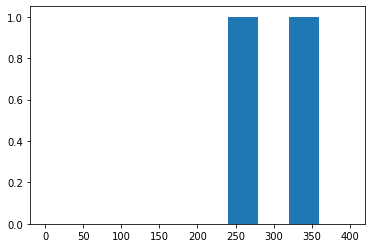

Distribuição de tokens na saida


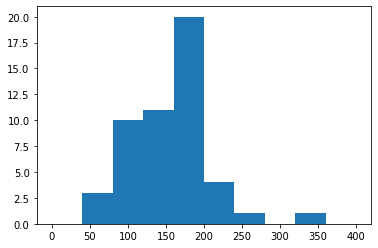

Distribuição de tokens na entrada/statements na saida


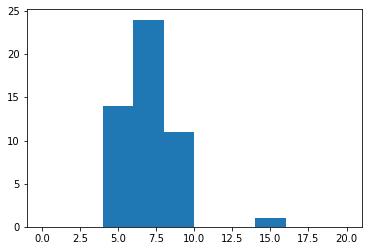

In [3]:
import matplotlib.pyplot as plt

def show_distributions(x, y):
    # Distribuicao do numero de palavras nas avaliacoes e titulos
    print("Distribuição de tokens na entrada")
    plt.hist([len(linha.split()) for linha in x], range=(0, 400))
    plt.show()
    print("Distribuição de tokens na saida")
    plt.hist([len(linha.split()) for linha in y], range=(0, 400))
    plt.show()
    print("Distribuição de tokens na entrada/statements na saida")
    statements = [len(linha.split()) for linha in y]
    tokens = [len(linha.split()) for linha in x]
    plt.hist([float(tokens[i])/statements[i] for i in range(len(x))], range=(0, 20))
    plt.show()

def joint_texts(a, b):
  out = []
  for i in range(len(a)):
    to_out = 'summarize: ' + a[i] + ' </s> ' + b[i]
    out.append(to_out[:-5])
  return out

x = joint_texts(pd_cstnews['title'], pd_cstnews['document'])
y = pd_cstnews['summary']
show_distributions(x, y)

In [4]:
from datasets import load_metric
rouge = load_metric("rouge")
print("Result:", rouge.compute(predictions=pd_cstnews["document"], references=pd_cstnews["summary"], rouge_types=["rouge1"]))

Result: {'rouge1': AggregateScore(low=Score(precision=0.13535974255111555, recall=0.9412586683481449, fmeasure=0.23569627555872924), mid=Score(precision=0.14427674858612988, recall=0.9537520388361529, fmeasure=0.24929160827257657), high=Score(precision=0.15307033774953355, recall=0.965173753091958, fmeasure=0.2623122533293909))}


In [14]:
import sys
sys.path.insert(0, '../../src/extractive_stage')
from extractive_models import tfidf, split_sentences

tfidf_inputs = []
summary = []
title = []
for i in range(len(x)):
    print(pd_cstnews["title"][i])
    splited = split_sentences(sep_docs[i], 100) # split in extracts of 100 words maximum
    ranked_docs = tfidf(splited, pd_cstnews["title"][i].lower(), n_tokens=1000)
    to_out_tfidf = ''
    for doc in ranked_docs:
        to_out_tfidf = to_out_tfidf + doc + ' </s> '
    tfidf_inputs.append(to_out_tfidf)
    summary.append(pd_cstnews['summary'][i])
    title.append(pd_cstnews["title"][i])

cstnews_df = pd.DataFrame({'title' : title, 'document' : tfidf_inputs, 'summary' : summary})
cstnews_df.to_csv(path + 'cstnews.csv')

mundo enchente reino unido
esportes pan natação
mundo bombardeio líbano
cotidiano pcc
mundo enchente coreia
mundo sri lanka
mundo acidente trens
mundo explosão moscou
política sanguessugas
politica eleição alckmin
mundo ataque virginia
esportes maradona
mundo avião congo
política cpmf
cotidiano reforma cumbica
cotidiano deslizamento congonhas
esportes fabiana mue
esportes copa américa
mundo furacão mexico
esportes goleada equador
esportes hepta volei
mundo indenizacao igreja
política reeleição lula
dinheiro lucro itau
esportes jade
mundo falha nuclear
cotidiano lula bio
cotidiano malha fina
mundo megatraficante
cotidiano morte acm
cotidiano motim maranhão
cotidiano pf
cotidiano acidente tam
política procurador renan
esportes recorde thiago
política relator renan
política renan
política renan
cotidiano rolex luciano
mundo terremoto japao
mundo turquia iraque
esportes vaia bernardinho
cotidiano vaia lula
cotidiano alagamento s p
política cpmf psdb
cotidiano anac
cotidiano canteiro obras


In [7]:
from datasets import load_metric
rouge = load_metric("rouge")
print("Result:", rouge.compute(predictions=pd_cstnews["cstsumm_summary"], references=pd_cstnews["summary"]))

Result: {'rouge1': AggregateScore(low=Score(precision=0.4993847489072, recall=0.5324709514684398, fmeasure=0.515392118488367), mid=Score(precision=0.5203056301261145, recall=0.5574326270583719, fmeasure=0.5358193941797245), high=Score(precision=0.5435337714285753, recall=0.5872310720277689, fmeasure=0.5602052794885674)), 'rouge2': AggregateScore(low=Score(precision=0.26489640909455875, recall=0.28380530304790114, fmeasure=0.2729693177924672), mid=Score(precision=0.29466103536809374, recall=0.3190958783129343, fmeasure=0.3050081482215774), high=Score(precision=0.3249394740336179, recall=0.3550128057741102, fmeasure=0.33674613956473837)), 'rougeL': AggregateScore(low=Score(precision=0.28305187995940007, recall=0.3024639558451471, fmeasure=0.2923430536554669), mid=Score(precision=0.3057955923151934, recall=0.3280047702885816, fmeasure=0.3148650051040287), high=Score(precision=0.3297749167058575, recall=0.3538534342002999, fmeasure=0.33919150166188583)), 'rougeLsum': AggregateScore(low=Sco